In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **Linear regression**

The goal is to find a (linear) formula

$$
y=w_1x_1+w_2x_2+\dots+w_nx_n+b
$$

for $y$ using the variables $x_1,x_2,\dots,x_n$.

Coefficents $w_1,w_2,\dots,w_n$ (weights) and $b$ (bias) are determined by the data by minimizing the cost function.







## **One variable**









Given: Datapoints
$
x^{(i)}, y^{(i)}
,\quad
i=1,2,...,m
$




Goal: find $w$ and $b$ such that
$$
y^{(i)}\approx wx^{(i)}+b
$$


 i.e the line
$
y=wx+b
$
goes through the data points as well as possible


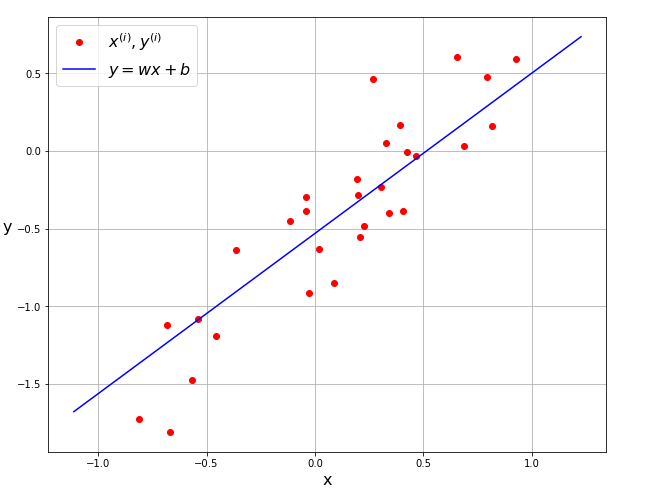

Coefficients $w$ and  $b$ are found by minimizing the **cost function** (**MSE**, Mean Squared Error)

$$
C=C(w,b)=\frac{1}{m}\sum_{i=1}^m (wx^{(i)}+b-y^{(i)})^2
$$

i.e the mean of the squares of vertical distances between the line and the data points

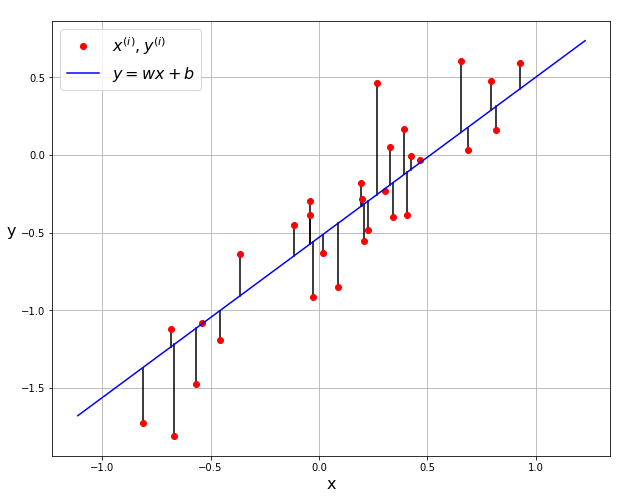

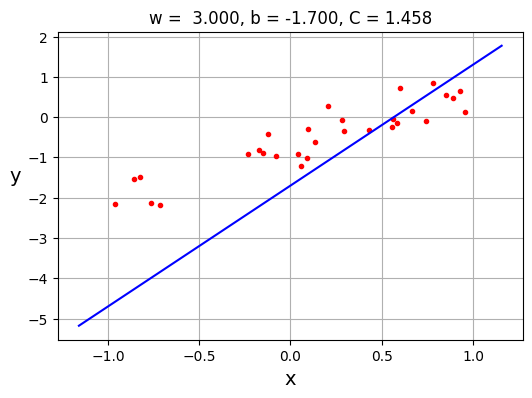

In [ ]:
#create datapoints
np.random.seed(0)
m=30 #number of points

#x = m random points between a ... b
a=-1
b=1
x=np.random.uniform(a,b,m) #uniformly distributed between a...b

#y=kx+p+error
k=1.4
p=-0.7
sigma=0.3
e=np.random.normal(0,sigma,m) #normally distributed with mean 0 and standard deviation sigma
y=k*x+p+e

#coefficients for line y=wx+b
w=3
b=-1.7
#MSE-cost C
C=1/m*np.sum((w*x+b-y)**2)

#endpoints of the line
r=0.2
xmin=np.min(x)-r
xmax=np.max(x)+r
xx=np.array([xmin,xmax])
yy=w*xx+b

plt.figure(figsize=(6,4))
plt.plot(x,y,'r.')#datapoints
plt.plot(xx,yy,'b') #line y=wx+b
plt.xlabel('x',fontsize=14)
plt.ylabel('y  ',fontsize=14,rotation=0)
plt.grid()
plt.title('w =  {:.3f}'.format(w)+', b = {:.3f}'.format(b)+', C = {:.3f}'.format(C))
plt.show()

 **Minimization by gradient descent**


Cost function
$$C=C(w,b)=\frac{1}{m}\,
\sum_{i=1}^m \,(wx^{(i)}+b-y^{(i)})^2$$

$$
$$

Partial derivatives (i.e derivatives with respect to $w$ and $b$) at the point $[w,b]$ are
$$
$$
$$
\begin{array}{l}
\displaystyle{\frac{\partial C}{\partial w}=\frac{1}{m}\,\sum_{i=1}^m \,2(wx^{(i)}+b-y^{(i)}) x^{(i)}}
\\\\
\displaystyle{\frac{\partial C}{\partial b}=\frac{1}{m}\,\sum_{i=1}^m \,2(wx^{(i)}+b-y^{(i)})}
\end{array}
$$

$$
$$


I.e, when changes  $\Delta w$ and $\Delta b$ of  $w$ and $b$ are small, then
$$
$$
$$
C(w+\Delta w,b)\approx C(w,b)+\underbrace{\frac{\partial C}{\partial w}\cdot \Delta w}_{\textrm{change of }C}
$$

$$
$$


$$
C(w,b+\Delta b)\approx C(w,b)+\underbrace{\frac{\partial C}{\partial b}\cdot \Delta b}_{\textrm{change of }C}
$$

$$
$$

$$
\hspace{-2cm}C(w+\Delta w,b+\Delta b)\approx C(w,b)+\underbrace{\frac{\partial C}{\partial w}\cdot \Delta w+\frac{\partial C}{\partial b}\cdot \Delta b}_{\textrm{change of }C}
$$


The **gradient** of $C$ at the point $[w,b]$ is the vector

$$
$$


$$
\nabla C=\left[\frac{\partial C}{\partial w},\frac{\partial C}{\partial b}\right]
$$


$$
\begin{array}{l}\\\end{array}
$$

Gradient is perpendicular to the level curve $C=C(w,b)$  and
the values of  $C$ increase fastest to the direction $\nabla C$ (steepest uphill) and decrease fastest to the opposite direction  $-\nabla C$ (steepest downhill)




In [ ]:
#partial derivatives of C at the point [w,b]
w=2.0
b=1.2
Cwb=1/m*np.sum((w*x+b-y)**2) #C(w,b)
dCw=1/m*np.sum(2*(w*x+b-y)*x) #derivative wrt w
dCb=1/m*np.sum(2*(w*x+b-y)) #derivative wrt b

print(dCw)
print(dCb,'\n')

dw=0.01 #change in w
db=0.01 #change in b
Cwdwb= 1/m*np.sum(((w+dw)*x+b-y)**2) #C(w+dw,b)
print(Cwdwb-Cwb)
print(dCw*dw,'\n')
Cwbdb= 1/m*np.sum((w*x+(b+db)-y)**2) #C(w,b+db)
print(Cwbdb-Cwb)
print(dCb*db,'\n')
Cwdwbdb=1/m*np.sum(((w+dw)*x+(b+db)-y)**2) #C(w+dw,b+db)
print(Cwdwbdb-Cwb)
print(dCw*dw+dCb*db)

1.0578018010278458
4.054047209630891 

0.010612049201548679
0.010578018010278458 

0.04064047209630939
0.04054047209630891 

0.05128496942917504
0.05111849010658737


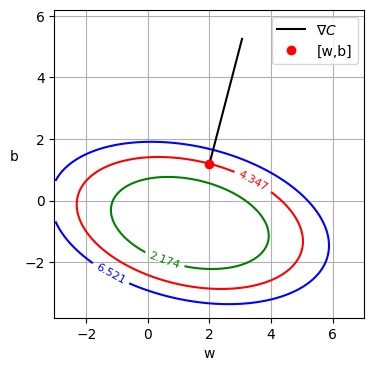

In [ ]:
#grid-points for the level curves of  C
ww=np.linspace(w-5,w+5,100)
bb=np.linspace(b-5,b+5,100)
ww,bb=np.meshgrid(ww,bb) #ww,bb-pairs
mw,nw=ww.shape
CC=np.zeros((mw,nw)) #values of C at the grid-points
for r in range(mw):
    for s in range(nw):
        CC[r,s]=1/m*np.sum((ww[r,s]*x+bb[r,s]-y)**2)

plt.figure(figsize=(4,4))
#level curves C=0.5*Cwb,C=Cwb,C=1.5*Cwb
levels=np.array([0.5*Cwb,Cwb,1.5*Cwb])
contours=plt.contour(ww,bb,CC,levels,colors=['g','r','b'])
plt.clabel(contours,fontsize=8)
plt.plot([w,w+dCw],[b,b+dCb],'k',label=r'$\nabla C$') #gradient at [w,b]
plt.plot(w,b,'ro',label='[w,b]')
plt.xlabel('w')
plt.ylabel('b  ',rotation=0)
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

**Gradient descent**:
choose initial values for $w$ and $b$ and update them as follows (move to the direction of steepest downhill):

$$
$$

$$
w=w-\alpha\cdot \frac{\partial C}{\partial w},\quad b=b-\alpha\cdot \frac{\partial C}{\partial b}
$$

i.e

$$
[w,b]\to [w,b]-\alpha \cdot \nabla C
$$

$$
$$
until the values of $C$ don't decrease any more.




$$
\begin{array}{l}\\\end{array}
$$

Coefficient $\alpha>0$ is called the  **learning rate**. It determines the length
$$
$$
$$\alpha \cdot \|\nabla C\|=\alpha\cdot \sqrt{\left(\frac{\partial C}{\partial w}\right)^2+\left(\frac{\partial C}{\partial b}\right)^2}$$
$$
$$
of the update step $-\alpha\cdot \nabla C$


In [ ]:
#gradient descent
#learning rate
alfa=0.5
#number of updates
N=500
#initial values
w=-2
b=2

#collect the values of w,b and C
#to the vectors W,B,Cost
W=np.zeros(N+1)
B=np.zeros(N+1)
Cost=np.zeros(N+1)
W[0]=w
B[0]=b
Cost[0]=1/m*np.sum((w*x+b-y)**2)

for n in range(N): #n=0,1,2,...,N-1
    #partial derivatives
    dCw=1/m*np.sum(2*(w*x+b-y)*x)
    dCb=1/m*np.sum(2*(w*x+b-y))
    #update
    w=w-alfa*dCw
    b=b-alfa*dCb
    #collect
    W[n+1]=w
    B[n+1]=b
    Cost[n+1]=1/m*np.sum((w*x+b-y)**2)

In [ ]:
#last coefficients and cost
print(w)
print(b)
print(Cost[N])

1.362924503681491
-0.7236640579959033
0.1108739279294733


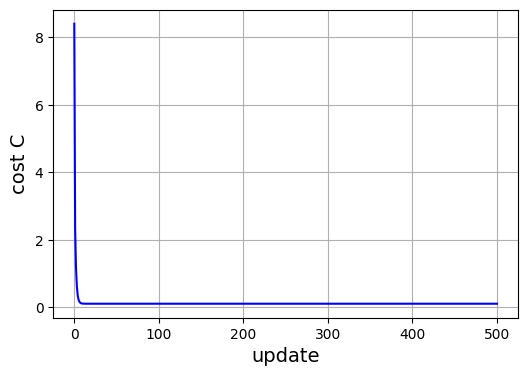

In [ ]:
#graph of the cost
plt.figure(figsize=(6,4))
plt.plot(Cost,'b')
plt.xlabel('update',fontsize=14)
plt.ylabel('cost C',fontsize=14)
plt.grid()
plt.show()

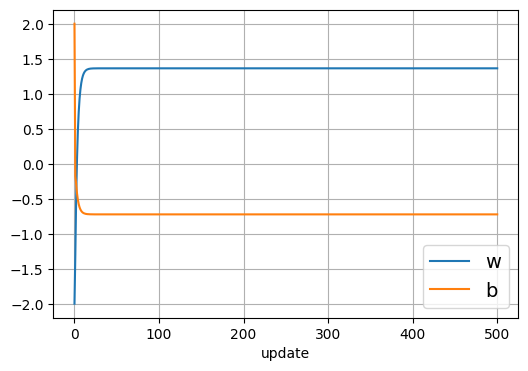

In [ ]:
#graphs of the coefficients
plt.figure(figsize=(6,4))
plt.plot(W,label='w')
plt.plot(B,label='b')
plt.xlabel('update')
plt.legend(fontsize=14)
plt.grid()
plt.show()

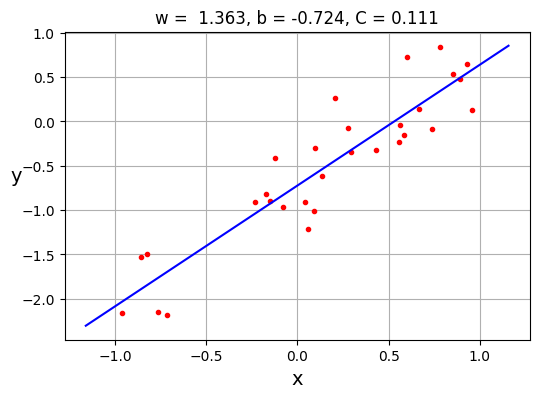

In [ ]:
#line y = wx+b
#endpoints
r=0.2
xmin=np.min(x)-r
xmax=np.max(x)+r
xx=np.array([xmin,xmax])
yy=w*xx+b
plt.figure(figsize=(6,4))
plt.plot(x,y,'r.')
plt.plot(xx,yy,'b')
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14,rotation=0)
plt.grid()
plt.title('w =  {:.3f}'.format(w)+', b = {:.3f}'.format(b)+', C = {:.3f}'.format(Cost[N]))
plt.show()

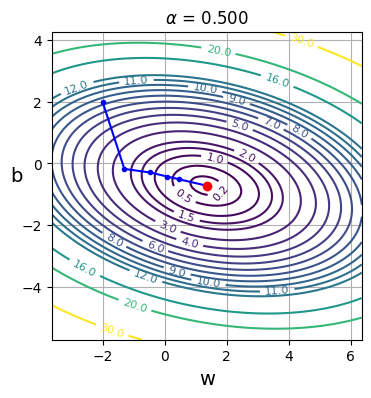

In [ ]:
#level curves of the cost function
ww=np.linspace(w-5,w+5,100)
bb=np.linspace(b-5,b+5,100)
ww,bb=np.meshgrid(ww,bb)
mw,nw=ww.shape
CC=np.zeros((mw,nw))
for r in range(mw):
    for s in range(nw):
        CC[r,s]=1/m*np.sum((ww[r,s]*x+bb[r,s]-y)**2)

plt.figure(figsize=(4,4))
#contours=plt.contour(ww,bb,CC,30) #30 level curves
levels=np.array([0.2,0.5,1,1.5,2,3,4,5,6,7,8,9,10,11,12,16,20,30])
contours=plt.contour(ww,bb,CC,levels) #level curves corresponding to C-values levels
plt.clabel(contours,fontsize=8)
plt.plot(W,B,'b') #the trajectory of updates
plt.plot(W[:5],B[:5],'b.') #first 5 updates
plt.plot(w,b,'ro') #last update
plt.xlabel('w',fontsize=14)
plt.ylabel('b',fontsize=14,rotation=0)
plt.title(r'$\alpha$ = {:.3f}'.format(alfa))
plt.grid()

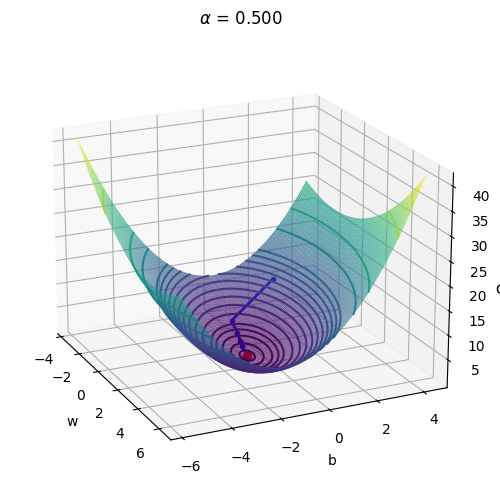

In [ ]:
#3D surface plot of C

from mpl_toolkits import mplot3d

plt.figure(figsize=(6,6))
ax=plt.axes(projection='3d')
ax.contour3D(ww,bb,CC,levels)
ax.plot_surface(ww,bb,CC,rstride=1, cstride=1,cmap='viridis', edgecolor='none',alpha=0.7)
ax.plot3D(W,B,Cost,'b',linewidth=2)
ax.plot3D(W[:5],B[:5],Cost[:5],'b.')
ax.plot3D(w,b,Cost[N],'ro')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title(r'$\alpha$ = {:.3f}'.format(alfa))
ax.view_init(elev=20, azim=-25, roll=0)
plt.show()

Note: if the learning rate $\alpha$ is small, the minimum is aproached slowly with small steps, and if it is large, the steps are longer.
If $\alpha$ is too large, the values of $C$ might start to increase during the updates


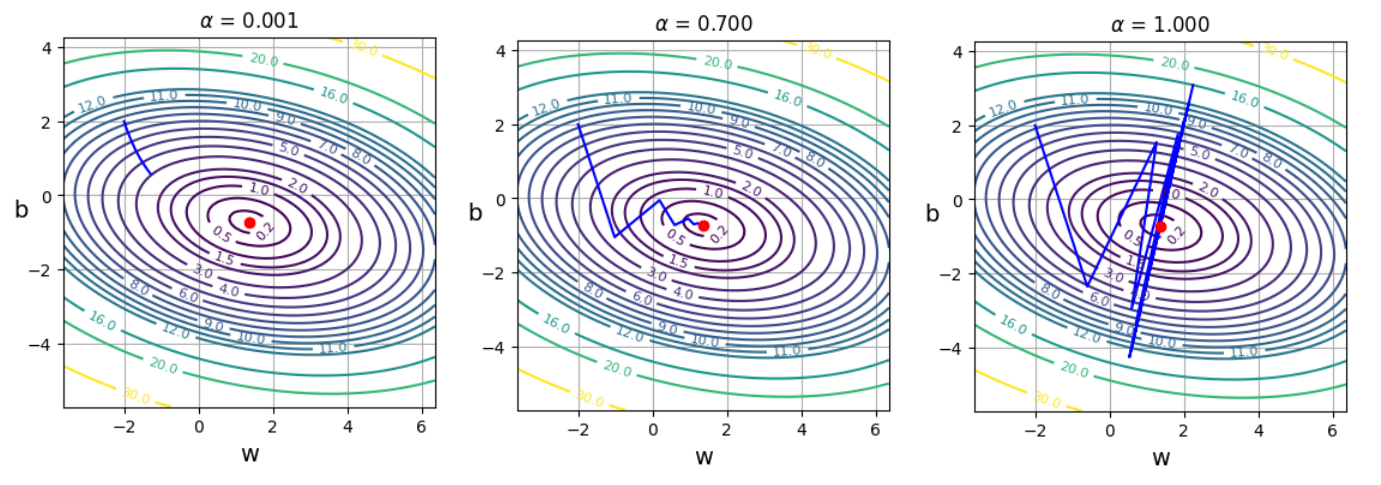

Note: In this particular case the $C$-minimizing values for the coefficients $w$ and $b$ can  be found exactly as zeros of the partial derivatives of C (Least squares solution/line):

 $$
\left\{
\begin{array}{l}
\displaystyle{\frac{\partial C}{\partial w}=\frac{2}{m} \sum_{i=1}^m (wx^{(i)}+b-y^{(i)})x^{(i)}=0}\\\\
\displaystyle{\frac{\partial C}{\partial b}=\frac{2}{m}  \sum_{i=1}^m (w x^{(i)}+b-y^{(i)}})=0
\end{array}
\right.
$$

$$
\begin{array}{l}\\\end{array}
$$



Solution

$$
\begin{array}{l}\\\end{array}
$$


$$\left[\begin{array}{c}
w\\b
\end{array}\right]
=(X^T@X)^{-1}@ X^T@ Y
$$



where

$$
X=\left[\begin{array}{cc}
x^{(1)}&1\\
x^{(2)}&1\\
\vdots&\vdots\\
x^{(m)}&1
\end{array}\right], \quad Y= \left[\begin{array}{c}
y^{(1)}\\y^{(2)}\\\vdots\\y^{(m)}\end{array}\right]
$$

$$
\begin{array}{l}\\\end{array}
$$

$X^T$ is the transpose of $X$, $@$ the matrix multiplication, $(X^T@X)^{-1}$ is the inverse of   $X^T@X$.



In [ ]:
#exact minimum (least squares solution)
X=np.zeros((m,2))
X[:,0]=x
X[:,1]=np.ones(m)
Y=y.reshape(m,1)
wb=np.linalg.inv(X.T@X)@X.T@Y
w0=wb[0,0]
b0=wb[1,0]
C0=1/m*np.sum((w0*x+b0-y)**2)
print(w0)
print(b0)
print(C0)

1.3629245036814917
-0.7236640579959033
0.1108739279294733



Using the [scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)-library

In [ ]:
from sklearn.linear_model import LinearRegression

X=x.reshape(m,1) #column vector, (m,1)-array
#y is 1D-array, (m,)
model=LinearRegression().fit(X,y)

w=model.coef_
print(w)

b=model.intercept_
print(b)


[1.3629245]
-0.7236640579959033


## $n$  **variables**





Given: data points
$x^{(i)}=[x^{(i)}_1,x^{(i)}_2,\dots,x^{(i)}_n],\,y^{(i)},\quad i=1,2,\dots,m$

$$
\begin{array}{l}\\
\end{array}
$$




Goal:
find coefficients $w_1,w_2,\dots,w_n$ and $b$ to the formula

$$y= w_1x_1+w_2x_2+\dots + w_nx_n+b$$





 such that

$$
y^{(i)}\approx  w_1x_1^{(i)}+w_2x_2^{(i)}+\dots + w_nx_n^{(i)}+b
$$

as well as possible,  i.e  the plane


$$
y=w_1x_1+w_2x_2+\dots + w_nx_n+b
$$

goes through the data points as well as possible




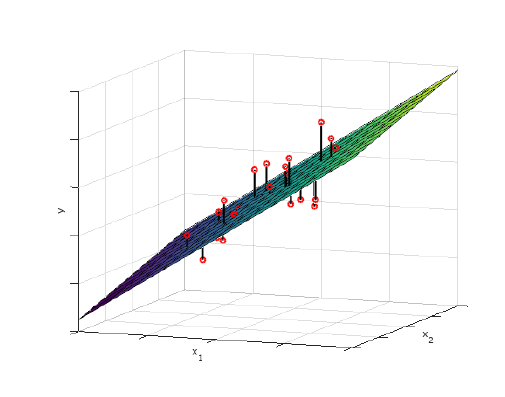

Cost function (MSE, Mean Squared Error)

$$
C=\frac{1}{m}\,\sum_{i=1}^m \left(w_1x^{(i)}_1+w_2x^{(i)}_2+\dots +w_nx^{(i)}_n+b-y^{(i)}\right)^2
$$


Minimization of $C$ by gradient descent:

choose initial values for
$w_1,w_2,\dots,w_n$ and $b$ and update them as follows:

$$\begin{array}{l}
\displaystyle{w_j=w_j-\alpha\cdot \frac{\partial C}{\partial w_j}},\quad j=1,2,\dots,n\\\\
\displaystyle{b=b-\alpha\cdot \frac{\partial C}{\partial b}}
\end{array}
$$

until the values of  $C$ don't decrease any more.

Here $\alpha>0$ is the learning rate and partial derivatives

$$\begin{array}{l}
\displaystyle{\frac{\partial C}{\partial w_j}=\frac{1}{m}\,\sum_{i=1}^m \,2\left(w_1x^{(i)}_1+w_2x^{(i)}_2+\dots +w_nx^{(i)}_n+b-y^{(i)}\right) x^{(i)}_j}\\\\
\displaystyle{\frac{\partial C}{\partial b}=\frac{1}{m}\,\sum_{i=1}^m \,2\left(w_1x^{(i)}_1+w_2x^{(i)}_2+\dots +w_nx^{(i)}_n+b-y^{(i)}\right)}
\end{array}
$$

Exact minimum (partial derivatives =  0, Least squares solution):





$$\left[\begin{array}{c}
w_1\\w_2\\\vdots\\w_n\\b
\end{array}\right]
=(X^T@X)^{-1}@X^T@Y
$$



where

$$\hspace{-1cm}
X=\left[\begin{array}{ccccc}
x^{(1)}_1&x^{(1)}_2&\dots&x^{(1)}_n&1\\
x^{(2)}_1&x^{(2)}_2&\dots&x^{(2)}_n&1\\
\vdots&\vdots&&\vdots&\vdots\\
x^{(m)}_1&x^{(m)}_2&\dots&x^{(m)}_n&1
\end{array}\right],\quad
Y=\left[\begin{array}{c}
y^{(1)}\\y^{(2)}\\\,\vdots\,\\y^{(m)}\end{array}\right]
$$


###**Cars-dataset**

5 variables $x_1,...,x_5$,  value to predict $y=MPG$ (miles per gallon)

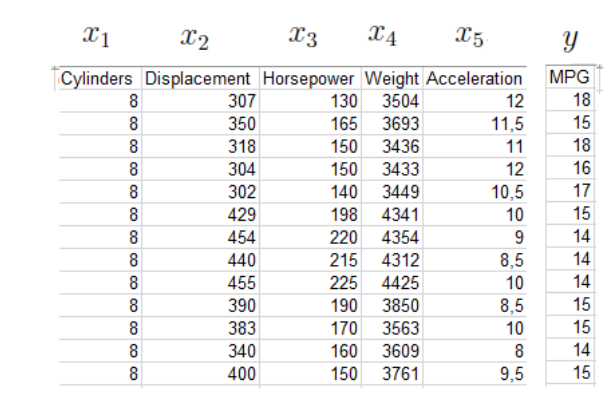

In [ ]:
#load cars.txt to colab
data=np.loadtxt('cars.txt')
m,n=data.shape
print(m)
print(n)

392
6


In [ ]:
X=data[:,:5]
y=data[:,5]
print(X[0:5,:])
print(y[0:5])

[[   8.   307.   130.  3504.    12. ]
 [   8.   350.   165.  3693.    11.5]
 [   8.   318.   150.  3436.    11. ]
 [   8.   304.   150.  3433.    12. ]
 [   8.   302.   140.  3449.    10.5]]
[18. 15. 18. 16. 17.]


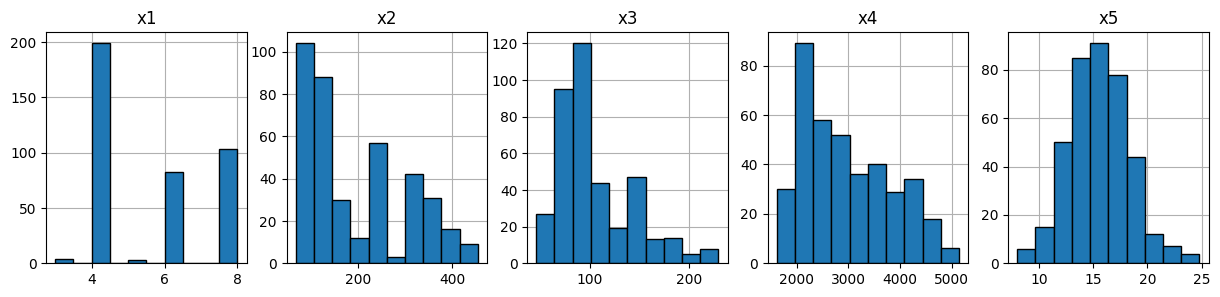

In [ ]:
#distribution of values of the variables
plt.figure(figsize=(15,3))
for k in range(5):
  plt.subplot(1,5,k+1)
  plt.hist(X[:,k],10,edgecolor='k',zorder=2)
  plt.grid()
  plt.title('x'+str(k+1))

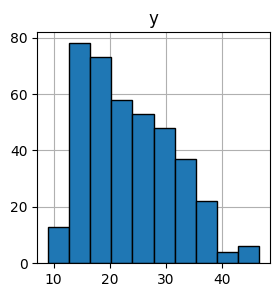

In [ ]:
#distribution of values of y
plt.figure(figsize=(3,3))
plt.hist(y,edgecolor='k',zorder=2)
plt.grid()
plt.title('y')
plt.show()

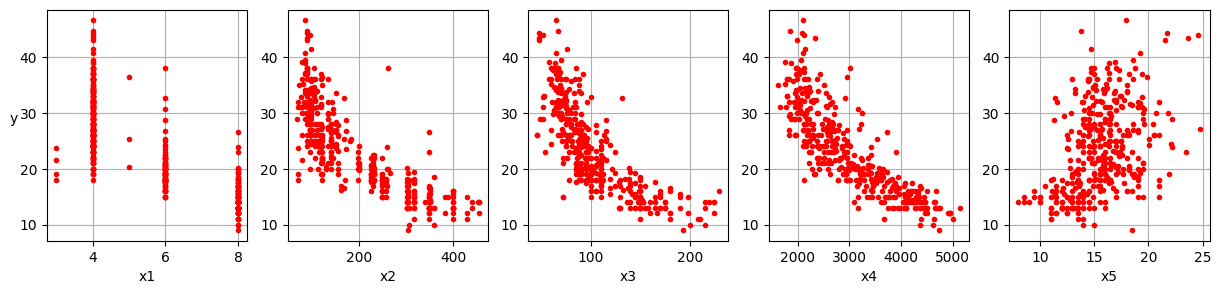

In [ ]:
#dependency of y of the variables x1-x5
plt.figure(figsize=(15,3))
for k in range(5):
  plt.subplot(1,5,k+1)
  plt.plot(X[:,k],y,'r.')
  plt.grid()
  plt.xlabel('x'+str(k+1))
  if k==0:
    plt.ylabel('y',rotation=0)

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(X,y)
w=model.coef_
b=model.intercept_

np.set_printoptions(precision=3,linewidth=300,suppress=True)
#suppress=True-> doesn't show e-forms of decimals i.e 5.0e-4 etc
print(w)
print(b)

[-0.398 -0.    -0.045 -0.005 -0.029]
46.26430785257114


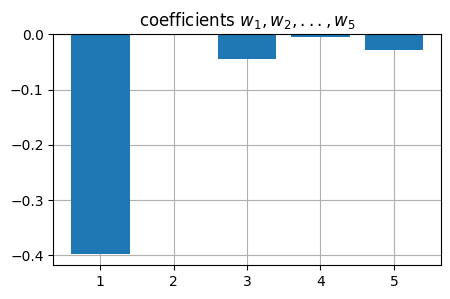

In [ ]:
plt.figure(figsize=(5,3))
plt.bar(np.arange(1,6),w,zorder=2)
plt.grid()
plt.xticks(np.arange(1,6))
plt.title('coefficients $w_1,w_2,...,w_5$')
plt.show()

In [ ]:
#predicted values for y from the formula
ypred=np.sum(w*X,axis=1)+b

#minimum value of the cost
#mse=mean squared error
mse=1/m*np.sum((ypred-y)**2)
print(mse)
#mae=mean average error
mae=1/m*np.sum(np.abs(ypred-y))
print(mae)

17.761396105406217
3.2223001384505614


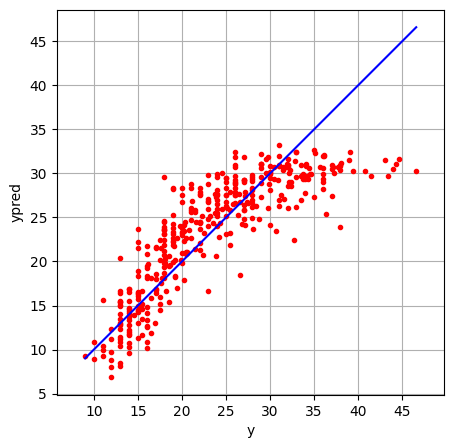

In [ ]:
#given y vs. predicted y
ymin=np.min(y)
ymax=np.max(y)
plt.figure(figsize=(5,5))
plt.plot(y,ypred,'r.')
plt.plot([ymin,ymax],[ymin,ymax],'b')
plt.grid()
plt.axis('equal')
plt.xlabel('y')
plt.ylabel('ypred')
plt.show()

In [ ]:
#test point
xt=np.array([8,307,130,3504,12])
#predicted y
yt=np.sum(w*xt)+b
print(yt)

18.647724659013445


In [ ]:
#scaled coordinates, means=0 and standard deviations=1
mu=np.mean(X,axis=0) #means of the coordinates of the datapoints, [mu1,mu2,mu3,mu4,mu5]
print(mu)
s=np.std(X,axis=0) #standard deviations of the coordinates, [s1,s2,s3,s4,s5]
print(s)
Xhat=(X-mu)/s #scaled coordinates, [(x1-mu1)/s1,(x2-mu2)/s2,(x3-mu3)/s3,(x4-mu4)/s4,(x5-mu5)/s5]

[   5.47193878  194.4119898   104.46938776 2977.58418367   15.54132653]
[  1.70360611 104.51044418  38.44203271 848.31844657   2.75534291]


In [ ]:
print(np.mean(Xhat,axis=0))
print(np.std(Xhat,axis=0))

[-2.16946642e-16 -2.53765263e-16 -3.96508223e-16  6.83976685e-17
  6.24103943e-15]
[1. 1. 1. 1. 1.]


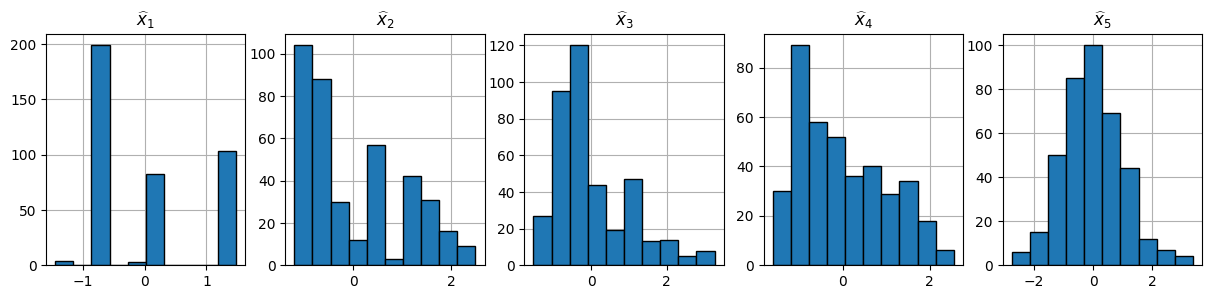

In [ ]:
#distributions of the values of the  scaled coordinates
plt.figure(figsize=(18,3))
for k in range(5):
  plt.subplot(1,n,k+1)
  plt.hist(Xhat[:,k],10,edgecolor='k',zorder=2)
  plt.grid()
  plt.title('$\widehat{{x}}_{0}$'.format(k+1))

Formula for $y$ using the scaled coordinates:

$$
x=[x_1,x_2,x_3,x_4,x_5]\,
\to\, y=\widehat{w}_1\widehat{x}_1+\widehat{w}_2\widehat{x}_2+...+\widehat{w}_5\widehat{x}_5+\widehat{b}
$$


where

$$
\widehat{x}_j=\frac{x_j-\mu_j}{\sigma_j},\quad j=1,2,...,5$$

are the scaled coordinates of $x$

In [ ]:
#coefficients for the formula using the scaled coordinates
model_hat=LinearRegression().fit(Xhat,y)

what=model_hat.coef_
print(what)
bhat=model_hat.intercept_
print(bhat)

[-0.678 -0.009 -1.74  -4.4   -0.08 ]
23.445918367346938


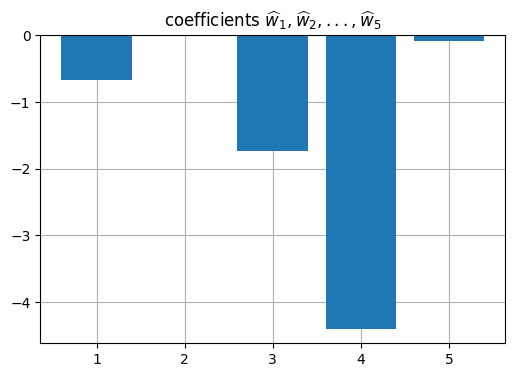

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(np.arange(1,6),what,zorder=2)
plt.grid()
plt.xticks(np.arange(1,6))
plt.title('coefficients $\widehat{w}_1,\widehat{w}_2,...,\widehat{w}_5$')
plt.show()

In [ ]:
#test point
xt=np.array([8,307,130,3504,12])
#scaling
xt_hat=(xt-mu)/s
#predicted y
yt=np.sum(what*xt_hat)+bhat
print(yt)

18.647724659013438


## **Recommender system**


[L. Serrano: How does Netflix recommend movies ?](https://www.youtube.com/watch?v=ZspR5PZemcs)

[A Ng: Recommender systems](https://www.youtube.com/watch?v=GIcuSNAAa4g)




**Matrix Factorization**

Matrix factorization is a class of **collaborative filtering** algorithms used in recommender systems. Matrix factorization algorithms work by decomposing the user-item interaction matrix into the product of two lower dimensional rectangular matrices. This family of methods became widely known during the Netflix prize challenge due to its effectiveness as reported by Simon Funk in his 2006 blog post, where he shared his findings with the research community.

Matrix factorization can be used to discover features underlying the interactions between two different kinds of entities. And one obvious application is to predict ratings — in other words, to recommend items to users.

Why perform matrix factorization?

One advantage of employing matrix factorization for recommender systems is the fact that it can incorporate implicit feedback—information that’s not directly given but can be derived by analyzing user behavior—such as items frequently bought or viewed.

Using this capability we can estimate if a user is going to like a movie that they never saw. And if that estimated rating is high, we can recommend that movie to the user, so as to provide a more personalized experience.

For example, two users might give high ratings to a certain movie if they both like the actors/actresses of the movie, or if the movie is a thriller movie, which is a genre preferred by both users.

Hence, if we can discover these kinds of **latent features** (like genre or actors and directors), we should be able to predict a rating with respect to a certain user and a certain item, because the features associated with the user should match with the features associated with the item.

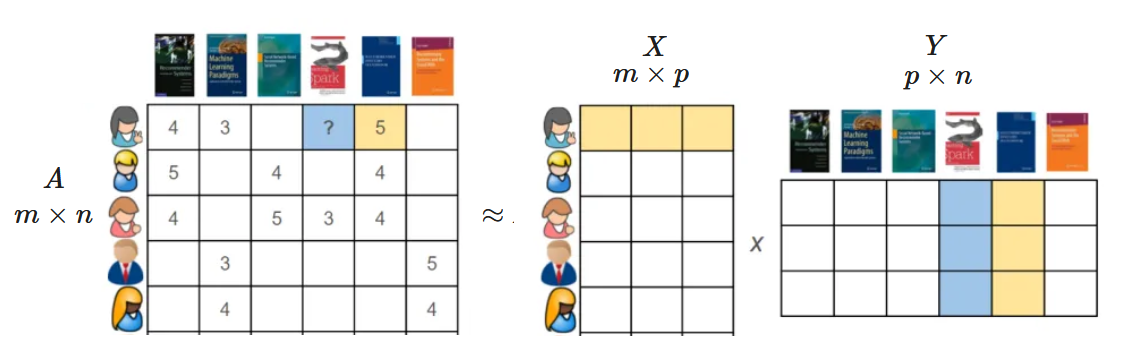

Rows of $A=$ persons, columns $=$ items

Ratings $A_{ij}=1,2,3,4,5$, for example

$A_{ij}=0\leftrightarrow$ there is no rating $ij$

$$\begin{array}{l}\end{array}$$

**Goal**: find matrices  $X$ and $Y$ such that $A_{ij}\approx (XY)_{ij}$, when $A_{ij}\ne 0$

$$\begin{array}{l}\end{array}$$

$A$ is $m\times n$, $X$ is $m\times p$, $Y$ is $p\times n$

 $  p$ is the number of latent features


$$\begin{array}{l}\end{array}$$


Minimize the cost


$$\begin{array}{rl}C&=\underset{A_{ij}\ne 0}{\displaystyle{\sum_{i=1}^m\sum_{j=1}^n}} ((XY)_{ij}-A_{ij})^2+\beta (||X||^2+||Y||^2)\\\\
&=\underset{A_{ij}\ne 0}{\displaystyle{\sum_{i=1}^m\sum_{j=1}^n}} \displaystyle{\left(\sum_{k=1}^pX_{ik}Y_{kj}-A_{ij}\right)^2}+\beta  (||X||^2+||Y||^2)\end{array}$$

$$\begin{array}{l}\end{array}$$


The term

$$
\beta (||X||^2+||Y||^2)=\beta \displaystyle{\left(\sum_{i=1}^m\sum_{j=1}^p X_{ij}^2 + \sum_{i=1}^p\sum_{j=1}^n Y_{ij}^2\right)}
$$

is so called $L^2$-regularization that prevents the elements of $
X$ and $Y$ from becoming too large (positive or negative).

Parameter $\beta>0$ determines the strength of the regularization. [A Ng: Regularization](
https://www.youtube.com/watch?v=QjOILAQ0EFg)

$$\begin{array}{l}\end{array}$$

Partial derivatives


$$
\frac{\partial C}{\partial X_{is}}=\displaystyle{\underset{A_{ij}\ne 0}{\sum_{j=1}^n} 2 \left(\sum_{k=1}^pX_{ik}Y_{kj}-A_{ij}\right) Y_{sj}+2\beta X_{is}}
$$

$$\begin{array}{l}\end{array}$$

$$
\frac{\partial C}{\partial Y_{sj}}=\displaystyle{\underset{A_{ij}\ne 0}{\sum_{i=1}^m} 2 \left(\sum_{k=1}^pX_{ik}Y_{kj}-A_{ij}\right) X_{is}+2\beta Y_{sj}}
$$

$$\begin{array}{l}\end{array}$$

$$i=1,2,\dots,m,\quad j=1,2,\dots,n,\quad s=1,2,\dots,p$$

$$\begin{array}{l}\end{array}$$

Gradient descent:

$$
X_{is}=X_{is}-\alpha\cdot \frac{\partial C}{\partial X_{is}}
,\quad
Y_{sj}=Y_{sj}-\alpha\cdot \frac{\partial C}{\partial Y_{sj}}
$$



In [2]:
#create A
m=5
n=6
A=np.random.randint(1,6,(m,n)) #ratings 1-5
print(A,'\n')
z=15 #number of zeros
ind=np.random.randint(0,m*n,z) #indices of zeros
A2=A.reshape(m*n)
A2[ind]=0
print(A)

[[2 5 4 3 1 3]
 [4 3 3 5 5 3]
 [3 3 3 3 1 1]
 [4 1 1 5 4 3]
 [2 1 5 1 4 5]] 

[[2 0 4 0 1 3]
 [0 3 0 5 5 0]
 [0 3 0 3 1 0]
 [0 1 1 5 4 3]
 [0 1 0 1 0 5]]


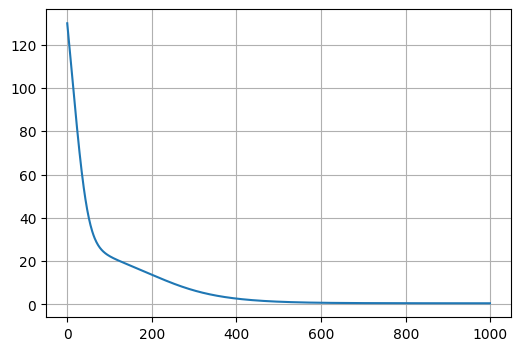

Cost = 0.5126630548666425 

XY =  
[[1.99 2.99 3.99 1.92 1.   3.01]
 [3.09 2.93 4.68 5.05 4.95 6.3 ]
 [1.57 3.01 3.12 2.97 1.02 2.11]
 [1.2  1.06 0.99 4.95 4.04 2.99]
 [2.25 1.04 3.51 0.97 3.05 4.99]] 

A =  
[[2 0 4 0 1 3]
 [0 3 0 5 5 0]
 [0 3 0 3 1 0]
 [0 1 1 5 4 3]
 [0 1 0 1 0 5]] 

X =  
[[ 1.37  1.34 -0.08]
 [ 1.41  1.47  1.96]
 [ 1.74  0.6   0.08]
 [ 1.   -0.33  2.05]
 [-0.12  1.91  1.1 ]] 

Y =  
[[ 0.56  1.5   1.17  1.74  0.33  0.53]
 [ 0.94  0.69  1.79 -0.26  0.53  1.79]
 [ 0.47 -0.1   0.2   1.53  1.9   1.48]]


In [12]:
p=3 #number of latent features

#initialize X and Y
X=np.random.uniform(0,1,(m,p))
Y=np.random.uniform(0,1,(p,n))
XY=X@Y
alfa=0.001 #learning rate
beta=0.01 #regularization strength
N=1000 #number of minimization steps
C=np.zeros(N) #costs

for k in range(N):
  #derivatives
  dX=np.zeros((m,p))
  dY=np.zeros((p,n))
  for i in range(m):
      for s in range(p):
          for j in range(n):
              if A[i,j]!=0:
                dX[i,s]+=2*(XY[i,j]-A[i,j])*Y[s,j]
          dX[i,s]+=2*beta*X[i,s]
  for j in range(n):
      for s in range(p):
          for i in range(m):
              if A[i,j]!=0:
                dY[s,j]+=2*(XY[i,j]-A[i,j])*X[i,s]
          dY[s,j]+=2*beta*Y[s,j]
  X-=alfa*dX
  Y-=alfa*dY
  XY=X@Y
  C[k]=np.sum((XY[A!=0]-A[A!=0])**2)+beta*(np.sum(X**2)+np.sum(Y**2))



plt.figure(figsize=(6,4))
plt.plot(C)
plt.grid()
plt.show()

print('Cost = '+str(C[N-1]),'\n')

np.set_printoptions(precision=2,suppress=True)
print('XY = ','\n'+str(XY),'\n')
print('A = ','\n'+str(A),'\n')
print('X = ','\n'+str(X),'\n')
print('Y = ','\n'+str(Y))